<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/(4)shareit_review_wordcloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 워드클라우드와 텍스트마이닝

In [ ]:
#구글 코랩 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#드라이브연결
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python/data


Jpype설치
- python에서 java라이브러리를 이용할 수 있도록 설치한다.

In [ ]:
#http://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
#아래 부분 실행하면 설치됨
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### KoNLPY(코엔엘파이)
- KoNLPY에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공한다

import

In [ ]:
## 기본
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# 현재 코랩에 설치돼 있는 것 확인
#!pip list

### 데이터 가져오기

In [ ]:
#utf-8 codec can's decode byte 0xb9 in position 0: invalid start byte
df = pd.read_csv('./shareit_review_wordcloud.csv', encoding='cp949')
gyms = list(df['Gym'])
review = list(df['Review'])
df.head()


,User_name,Gender,Gym,Grade,Review
0,이**,M,명지전문대학 예체능관 실내체육관,5,최저기온 영하15도에도 불구 따뜻하게 즐농했습니다.
1,김**,M,경기대학교(서울) 본관 실내체육관,5,기록적 추위에도 따뜻하고 깨끗한 체육관에서 즐겁게 운동했습니다
2,이**,M,한성대학교 상상관 실내체육관,5,개인적으로 사용한 체육관 시설 중 시설과 장비는 가장 좋았습니다. 다만 정말 상당히...
3,황**,F,N sports 실내체육관,4,체육관 정보에는 28 x 15 라고 나와있는데 막상 코트에서 뛰어보니 28 x 15...
4,박**,F,삼성썬더스 농구클럽 구리다산점 체육관A,5,아주만족했어요


In [ ]:
df.shape

(1107, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_name  1107 non-null   object
 1   Gender     1107 non-null   object
 2   Gym        1107 non-null   object
 3   Grade      1107 non-null   int64 
 4   Review     1107 non-null   object
dtypes: int64(1), object(4)
memory usage: 43.4+ KB


###명사단어 추출

1. 세종사전 실행

In [ ]:
from konlpy.tag import Okt
twitter = Okt()

2. 단어 리스트 만들기

In [ ]:
word_list = []
word_list = df['Review']

In [ ]:
word_list

0                            최저기온 영하15도에도 불구 따뜻하게 즐농했습니다.
1                      기록적 추위에도 따뜻하고 깨끗한 체육관에서 즐겁게 운동했습니다
2       개인적으로 사용한 체육관 시설 중 시설과 장비는 가장 좋았습니다. 다만 정말 상당히...
3       체육관 정보에는 28 x 15 라고 나와있는데 막상 코트에서 뛰어보니 28 x 15...
4                                                 아주만족했어요
                              ...                        
1102                                                  정수기
1103                                                  정수기
1104                                                  정수기
1105                                                  정수기
1106                                                  정수기
Name: Review, Length: 1107, dtype: object

### 3. 형태소 분리 및 품사태깅

In [ ]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('정수기', 'Noun')]


### 4.명사만 추출

In [ ]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

### 5. 명사가 두 문자 이상만 추출

In [ ]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['최저', '기온', '영하', '불구', '즐농', '기록', '추위', '체육관', '운동', '개인']

6. 단어 카운트

In [ ]:
counts = Counter(noun_list)
tags = counts.most_common(30)  #30개만 가져옴
print(len(tags))
tags

30


[('시설', 90),
 ('바닥', 90),
 ('난방', 89),
 ('주차', 89),
 ('가격', 89),
 ('화장실', 89),
 ('탈의실', 87),
 ('샤워실', 86),
 ('냉방', 85),
 ('정수기', 85),
 ('대기실', 85),
 ('이용', 82),
 ('체육관', 60),
 ('운동', 58),
 ('농구', 53),
 ('사용', 47),
 ('코트', 44),
 ('공간', 38),
 ('관리', 33),
 ('조금', 25),
 ('시간', 22),
 ('아이', 20),
 ('대관', 18),
 ('예약', 18),
 ('천장', 17),
 ('골대', 17),
 ('다음', 17),
 ('덕분', 17),
 ('정말', 16),
 ('상태', 16)]

### WordCloud생성

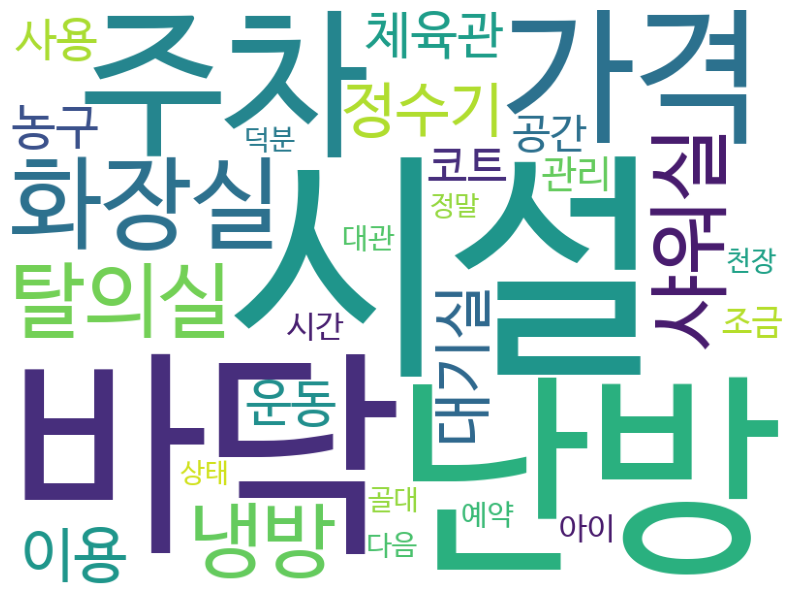

In [ ]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()